6728039253069564119
this node has 4 children
move:(2, 6), runs:  7472851, eval:-0.4528, principal:26 71 54 63 02 07 04 23 72 38 06 22 68 16 41 55 67 13 32 64 05 44 
move:(1, 6), runs:     2649, eval:+0.3213, principal:16 41 54 64 15 36 
move:(0, 7), runs:     2347, eval:+0.4210, principal:07 15 48 56 61 
move:(0, 6), runs:     2152, eval:+0.5000, principal:06 22 77 53 61 05 

26 71 54 63 02 07 04 23 72 38 06 22 68 16 41 55 67 13 32 64 05 44 53 82 77 56 61 15 47 76 50 58 66 


KeyboardInterrupt: 

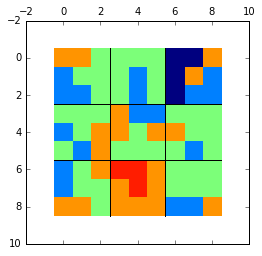

In [1]:
import sys
sys.path.append('../')

import tictactics_cython as tact
from tictactics_cython import Board
import MC
from MC import MC_node,mc_sim
from tictactics_policy import tictactics_simulation_policy as sim_pol
import matplotlib
import numpy as np
import cProfile
from matplotlib import pyplot as plt
import time
%matplotlib inline

board = np.zeros((9,9))
for x in [(0,0),(0,1),(0,8),(1,7),(4,3),(4,5),(8,0),(8,1),(8,8)]:
    board[x]=1
for o in [(1,0),(2,0),(1,4),(2,4),(1,8),(2,8),(3,4),(3,5),(6,0)]:
    board[o]=-1
big_board = np.array([[0,0,0],
                      [0,0,0],
                      [0,0,0]])

player = 1
game = Board(board=board,big_board = big_board,player = player)
for move in [(3,3),(2,1),(8,5),(8,6),(6,2),(2,7),(8,4),(7,5),(4,6),(5,1),(8,3),(7,0),(5,2),(8,7),(7,3),(4,0),(4,2),
             (5,7),(6,5)]:
    game.update_move(move)
log_len = len(game.log)

root = MC_node(game,1)

tact.fancy_board(game)

# cProfile.run('mc_sim(root,game,branch = 50,passes = 100000000)',sort = 'tottime')
mc_sim(root,game,branch = 50,passes = 100000000,eval_fun = None)

nodes visited   2132272
cache space     30000034
nodes stored    972214
nodes forgotten 782
current depth   0
current node    
role: min
root  : work:   1124069, INF    won, INF    not lost,      0 not won,      0 lost

role: max
(0, 6): work:    125859,    282 won,    282 not lost,    461 not won,    461 lost
(2, 6): work:    860838, INF    won, INF    not lost,      0 not won,      0 lost
(1, 6): work:     83589,    209 won,    209 not lost,    461 not won,    461 lost
(0, 7): work:     53782,    158 won,    158 not lost,    465 not won,    465 lost

time 9.81354454854
(2, 6)
	(6, 1)(0, 5)
		(0, 6)(2, 2)
			(6, 7)(0, 4) p2win
			(6, 8)(1, 6)
				(3, 0)(0, 2)
				(3, 1)(0, 4)
				(4, 1)(5, 4)
				(5, 0)(8, 2)
			(7, 6)(3, 2)
				(0, 7)(0, 4)
			(7, 7)(5, 3)
				(7, 2)(3, 8)
				(8, 2)(6, 8)
			(7, 8)(5, 6)
				(7, 1)(5, 4)
				(8, 2)(6, 8)
		(1, 6)(5, 0)
			(7, 1)(5, 4)
				(6, 3)(0, 2)
				(6, 4)(2, 3)
			(7, 2)(3, 8)
				(0, 6)(1, 2)
				(0, 7)(2, 3)
			(8, 2)(6, 8)
				(0, 6)(2, 2)

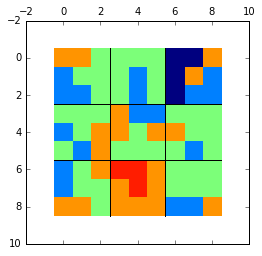

In [1]:
import sys
sys.path.append('../')

import tictactics_cython as tact
from tictactics_cython import Board
import dfpn
import matplotlib
import numpy as np
import cProfile
from matplotlib import pyplot as plt
import time
%matplotlib inline

board = np.zeros((9,9))
for x in [(0,0),(0,1),(0,8),(1,7),(4,3),(4,5),(8,0),(8,1),(8,8)]:
    board[x]=1
for o in [(1,0),(2,0),(1,4),(2,4),(1,8),(2,8),(3,4),(3,5),(6,0)]:
    board[o]=-1
big_board = np.array([[0,0,0],
                      [0,0,0],
                      [0,0,0]])

player = 1
game = Board(board=board,big_board = big_board,player = player)
for move in [(3,3),(2,1),(8,5),(8,6),(6,2),(2,7),(8,4),(7,5),(4,6),(5,1),(8,3),(7,0),(5,2),(8,7),(7,3),(4,0),(4,2),
             (5,7),(6,5)]:
    game.update_move(move)
log_len = len(game.log)
dfpn.init()

tact.fancy_board(game)
t0 = time.clock()
# cProfile.run('node,tree = dfpn.solve(game,root = True,epsilon=1.1)',sort = 'tottime')
node,tree = dfpn.solve(game,root = True,epsilon=1.02)
print 'time',time.clock() - t0
print tree